In [12]:
import pandas as pd

df = pd.read_csv('data/pumping.csv')
print(df.dtypes)



date_label              object
start_time_label        object
pump_left_volume_ml      int64
pump_right_volume_ml     int64
pump_total_volume_ml     int64
pump_duration_sec        int64
dtype: object


In [14]:
print(df.start_time_label.min())
print(df.start_time_label.max())

2018/3/30 11:57
2018/8/9 8:21


In [16]:
df[df['date_label'] == '2018/3/30']

,date_label,start_time_label,pump_left_volume_ml,pump_right_volume_ml,pump_total_volume_ml,pump_duration_sec
134,2018/3/30,2018/3/30 8:56,8,5,13,1320
166,2018/3/30,2018/3/30 5:15,9,5,14,960
379,2018/3/30,2018/3/30 11:57,-1,2,2,300
497,2018/3/30,2018/3/30 20:16,10,16,26,1200


In [23]:
maxpump = pd.DataFrame(df.groupby('date_label').pump_total_volume_ml.max()).reset_index()
maxpump[:10]

,date_label,pump_total_volume_ml
0,2018/3/30,26
1,2018/3/31,38
2,2018/4/10,90
3,2018/4/11,53
4,2018/4/12,50
5,2018/4/13,60
6,2018/4/14,65
7,2018/4/15,50
8,2018/4/16,75
9,2018/4/17,70


In [31]:
maxpumpdet = maxpump.merge(df,how='inner',on=['date_label','pump_total_volume_ml'])
maxpumpdet[:10]

,date_label,pump_total_volume_ml,start_time_label,pump_left_volume_ml,pump_right_volume_ml,pump_duration_sec
0,2018/3/30,26,2018/3/30 20:16,10,16,1200
1,2018/3/31,38,2018/3/31 15:19,23,15,1440
2,2018/4/10,90,2018/4/10 19:12,50,40,1860
3,2018/4/11,53,2018/4/11 12:19,25,28,1200
4,2018/4/12,50,2018/4/12 12:08,30,20,1440
5,2018/4/13,60,2018/4/13 21:19,25,35,1860
6,2018/4/14,65,2018/4/14 13:56,35,30,2160
7,2018/4/15,50,2018/4/15 15:03,30,20,1320
8,2018/4/16,75,2018/4/16 21:55,35,40,2640
9,2018/4/17,70,2018/4/17 2:52,30,40,1860


In [44]:
def assignWindows(row):
    hr = datetime(row['start_time_label']).hour
    if hr >= 20 and hr < 24:
        return 24
    elif hr >= 0 and hr < 4:
        return 4
    elif hr >= 4 and hr < 8:
        return 8
    elif hr >= 8 and hr < 12:
        return 12
    elif hr >= 12 and hr < 16:
        return 16
    elif hr >= 16 and hr < 20:
        return 20
    
maxpumpdet['window'] = 24
maxpumpdet.loc[(pd.DatetimeIndex(maxpumpdet['start_time_label']).hour >= 0) & (pd.DatetimeIndex(maxpumpdet['start_time_label']).hour <4), 'window'] = 4
maxpumpdet.loc[(pd.DatetimeIndex(maxpumpdet['start_time_label']).hour >= 4) & (pd.DatetimeIndex(maxpumpdet['start_time_label']).hour <8), 'window'] = 8
maxpumpdet.loc[(pd.DatetimeIndex(maxpumpdet['start_time_label']).hour >= 8) & (pd.DatetimeIndex(maxpumpdet['start_time_label']).hour <12), 'window'] = 12
maxpumpdet.loc[(pd.DatetimeIndex(maxpumpdet['start_time_label']).hour >= 12) & (pd.DatetimeIndex(maxpumpdet['start_time_label']).hour <16), 'window'] = 16
maxpumpdet.loc[(pd.DatetimeIndex(maxpumpdet['start_time_label']).hour >= 16) & (pd.DatetimeIndex(maxpumpdet['start_time_label']).hour <20), 'window'] = 20
maxpumpdet[:10]

,date_label,pump_total_volume_ml,start_time_label,pump_left_volume_ml,pump_right_volume_ml,pump_duration_sec,DayOrNight,window
0,2018/3/30,26,2018/3/30 20:16,10,16,1200,Night,24
1,2018/3/31,38,2018/3/31 15:19,23,15,1440,Night,16
2,2018/4/10,90,2018/4/10 19:12,50,40,1860,Night,20
3,2018/4/11,53,2018/4/11 12:19,25,28,1200,Day,16
4,2018/4/12,50,2018/4/12 12:08,30,20,1440,Day,16
5,2018/4/13,60,2018/4/13 21:19,25,35,1860,Night,24
6,2018/4/14,65,2018/4/14 13:56,35,30,2160,Day,16
7,2018/4/15,50,2018/4/15 15:03,30,20,1320,Night,16
8,2018/4/16,75,2018/4/16 21:55,35,40,2640,Night,24
9,2018/4/17,70,2018/4/17 2:52,30,40,1860,Night,4


   window  count
0       4     22
1       8     20
2      12     24
3      16     22
4      20     35
5      24     11


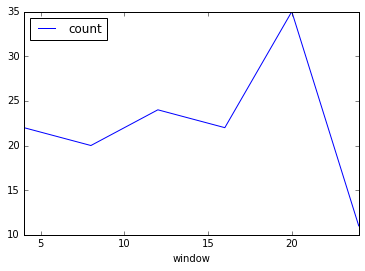

In [52]:
%matplotlib inline
byWindow = pd.DataFrame(maxpumpdet.groupby('window').date_label.count()).reset_index().rename(columns={'date_label':'count'})
print(byWindow)
byWindow.plot(x='window', y='count', kind='line')